## HCW and Tracer mass on shelf - parabolic profiles

In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
import canyon_tools.readout_tools as rout
import canyon_tools.savitzky_golay as sg

In [2]:
sns.set_context('notebook')
sns.set_style('whitegrid')

In [3]:
# Grid, state and tracers datasets of base case
grid_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF_LOWER_SR_7Tr/run01/gridGlob.nc'
grid = xr.open_dataset(grid_file)

state_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF_LOWER_SR_7Tr/run01/stateGlob.nc' 
state = xr.open_dataset(state_file)

ptracers_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF_LOWER_SR_7Tr/run01/ptracersGlob.nc'
ptracers = xr.open_dataset(ptracers_file)

ptracers_fileNoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF_LOWER_SR_7Tr/run02/ptracersGlob.nc'
ptracersNoC = xr.open_dataset(ptracers_fileNoC)


In [6]:
fileLWR = ('/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF_LOWER_SR_7Tr/HCW_TrMass_CNTDIFF_LOWER_SR_7Tr_run01.csv')
fileLWRNoC = ('/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF_LOWER_SR_7Tr/HCW_TrMass_CNTDIFF_LOWER_SR_7Tr_run02.csv') 

dfLWR = pd.read_csv(fileLWR)
dfLWRnoc = pd.read_csv(fileLWRNoC)
                

In [38]:

HCW_list = ['HCW01','HCW02','HCW03','HCW04','HCW05','HCW06','HCW07']
Mass_list = ['TrMassHCW01','TrMassHCW02','TrMassHCW03','TrMassHCW04',
             'TrMassHCW05','TrMassHCW06','TrMassHCW07']
TotMass_list = ['TotTrMass01','TotTrMass02','TotTrMass03','TotTrMass04',
             'TotTrMass05','TotTrMass06','TotTrMass07']

labels = ['Tr1','Tr2','Tr3','Tr4','Tr5','Tr6','Tr7']

colours = ['purple','blue','green','gold','orange','red','orchid']

                

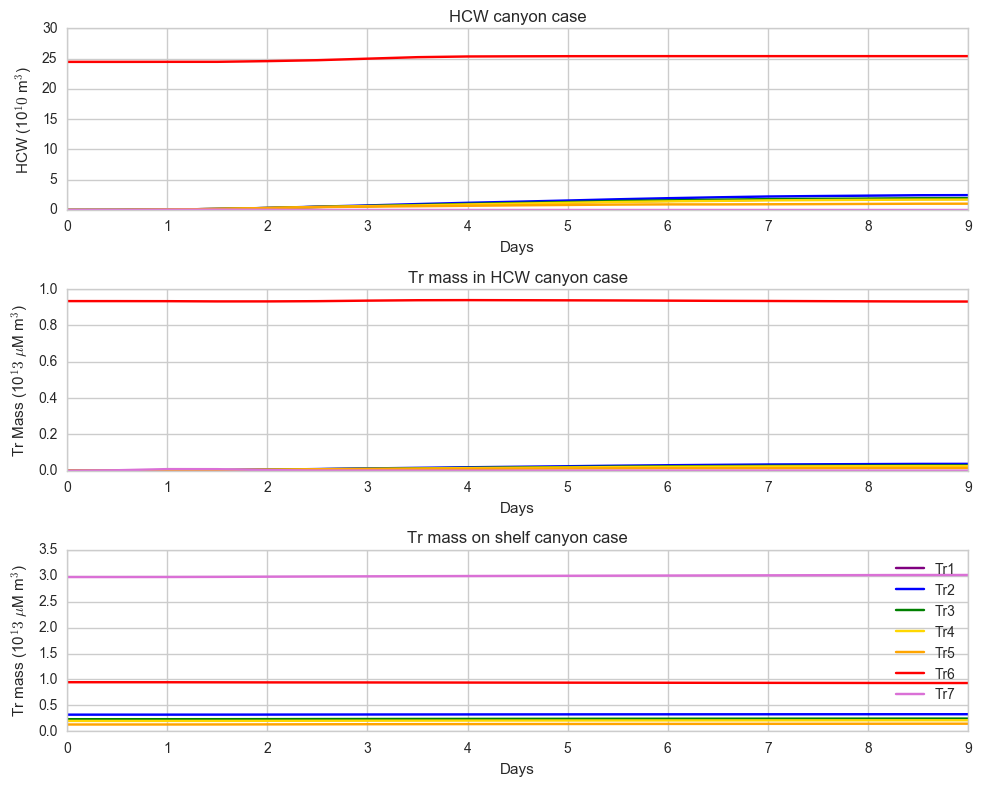

In [19]:
fig,ax = plt.subplots(3,1,figsize=(10,8))

for HCW, TrMass, TotTrMass,lab, col in zip(HCW_list,Mass_list,TotMass_list,labels,colours):
    
     ax[0].plot(np.arange(0,19,1)/2.0,(dfLWR[HCW])/1E10,color=col,label=lab)
     ax[1].plot(np.arange(0,19,1)/2.0,(dfLWR[TrMass])/1E13,color=col,label=lab)
     ax[2].plot(np.arange(0,19,1)/2.0,(dfLWR[TotTrMass])/1E13,color=col,label=lab)


ax[0].set_ylabel('HCW (10$^10$ m$^3$)')
ax[1].set_ylabel('Tr Mass (10$^13$ $\mu$M m$^3$)')
ax[2].set_ylabel('Tr mass (10$^13$ $\mu$M m$^3$)')

ax[0].set_xlabel('Days')
ax[0].set_title('HCW canyon case')

ax[1].set_xlabel('Days')
ax[1].set_title('Tr mass in HCW canyon case')

ax[2].set_xlabel('Days')
ax[2].set_title('Tr mass on shelf canyon case')


ax[2].legend(loc=0)
plt.tight_layout()


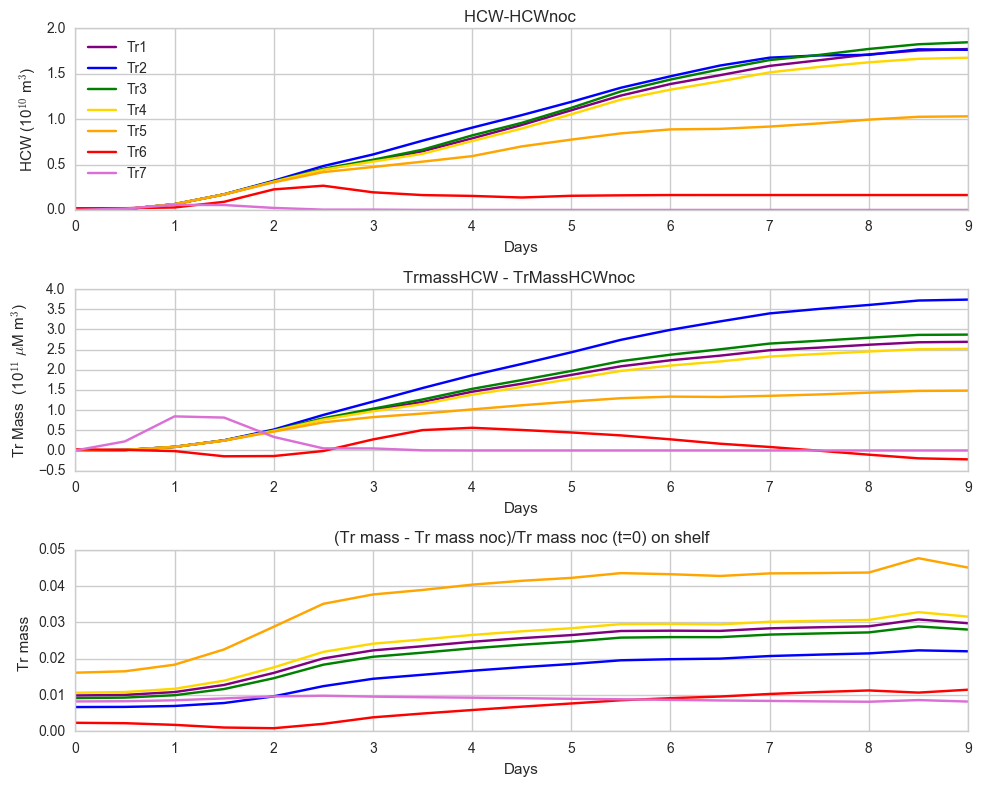

In [36]:
fig,ax = plt.subplots(3,1,figsize=(10,8))

for HCW, TrMass, TotTrMass,lab, col in zip(HCW_list,Mass_list,TotMass_list,labels,colours):
    
     ax[0].plot(np.arange(0,19,1)/2.0,(dfLWR[HCW]-dfLWRnoc[HCW])/1E10,color=col,label=lab)
     ax[1].plot(np.arange(0,19,1)/2.0,(dfLWR[TrMass]-dfLWRnoc[TrMass][0])/1E11,color=col,label=lab)
     ax[2].plot(np.arange(0,19,1)/2.0,(dfLWR[TotTrMass]-dfLWRnoc[TotTrMass])/dfLWR[TotTrMass][0],color=col,label=lab)


ax[0].set_ylabel('HCW (10$^{10}$ m$^3$)')
ax[1].set_ylabel('Tr Mass  (10$^{11}$ $\mu$M m$^3$)')
ax[2].set_ylabel('Tr mass ')

ax[0].set_xlabel('Days')
ax[0].set_title('HCW-HCWnoc ')

ax[1].set_xlabel('Days')
ax[1].set_title('TrmassHCW - TrMassHCWnoc ')

ax[2].set_xlabel('Days')
ax[2].set_title('(Tr mass - Tr mass noc)/Tr mass noc (t=0) on shelf')


ax[0].legend(loc=2)
plt.tight_layout()


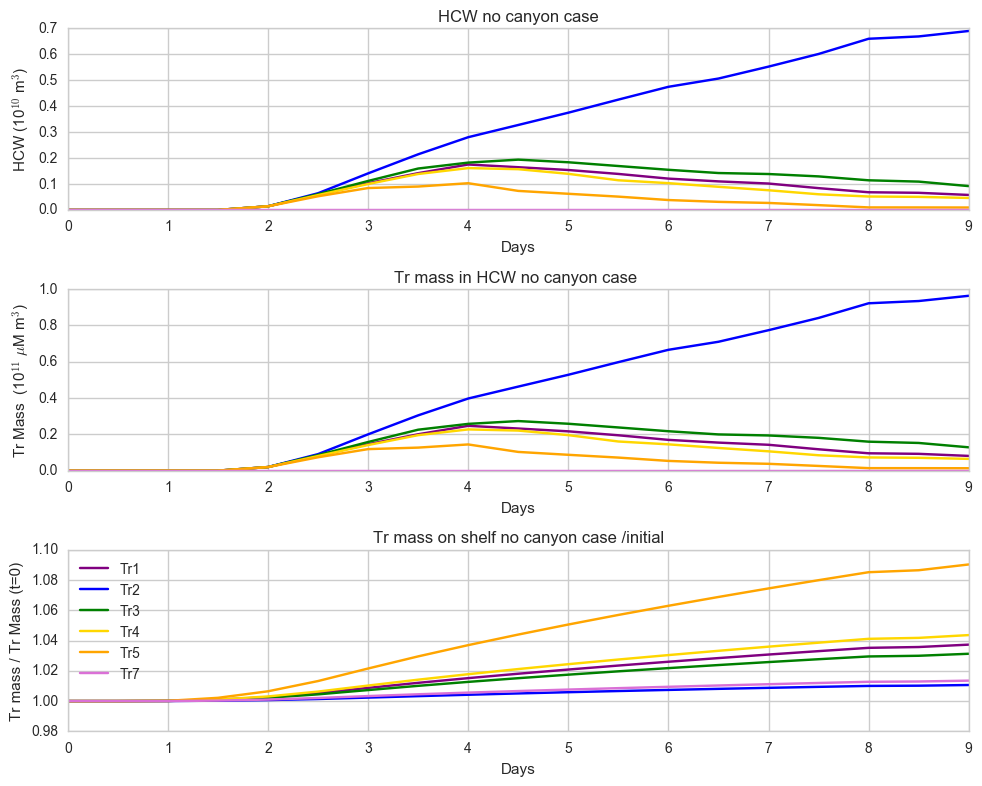

In [40]:
HCW_list = ['HCW01','HCW02','HCW03','HCW04','HCW05','HCW07']
Mass_list = ['TrMassHCW01','TrMassHCW02','TrMassHCW03','TrMassHCW04',
             'TrMassHCW05','TrMassHCW07']
TotMass_list = ['TotTrMass01','TotTrMass02','TotTrMass03','TotTrMass04',
             'TotTrMass05','TotTrMass07']

labels = ['Tr1','Tr2','Tr3','Tr4','Tr5','Tr7']

colours = ['purple','blue','green','gold','orange','orchid']


fig,ax = plt.subplots(3,1,figsize=(10,8))

for HCW, TrMass, TotTrMass,lab, col in zip(HCW_list,Mass_list,TotMass_list,labels,colours):
    
     ax[0].plot(np.arange(0,19,1)/2.0,(dfLWRnoc[HCW])/1E10,color=col,label=lab)
     ax[1].plot(np.arange(0,19,1)/2.0,(dfLWRnoc[TrMass])/1E11,color=col,label=lab)
     ax[2].plot(np.arange(0,19,1)/2.0,(dfLWRnoc[TotTrMass])/dfLWRnoc[TotTrMass][0],color=col,label=lab)


ax[0].set_ylabel('HCW (10$^{10}$ m$^3$)')
ax[1].set_ylabel('Tr Mass  (10$^{11}$ $\mu$M m$^3$)')
ax[2].set_ylabel('Tr mass / Tr Mass (t=0)')

ax[0].set_xlabel('Days')
ax[0].set_title('HCW no canyon case')

ax[1].set_xlabel('Days')
ax[1].set_title('Tr mass in HCW no canyon case ')

ax[2].set_xlabel('Days')
ax[2].set_title('Tr mass on shelf no canyon case /initial')


ax[2].legend(loc=0)
plt.tight_layout()
